In [29]:
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SpaceMissions.csv to SpaceMissions (1).csv


In [30]:
data=pd.read_csv('SpaceMissions.csv')

In [31]:
data.head()

,Company,Launch Date,Launch Time,Launch Site,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Mission Status,Failure Reason
0,SpaceX,24 March 2006,22:30,Marshall Islands,86.0,9.0,74.0,Falcon 1,343,470,22.25,1.5,FalconSAT-2,Research Satellite,19.5,Low Earth Orbit,Failure,Engine Fire During Launch
1,SpaceX,21 March 2007,1:10,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,DemoSat,Mass simulator,NaN,Low Earth Orbit,Failure,Engine Shutdown During Launch
2,SpaceX,3 August 2008,3:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Trailblazer,Communication Satellite,NaN,Low Earth Orbit,Failure,Collision During Launch
3,SpaceX,3 August 2008,3:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,"PRESat, NanoSail-D",Research Satellites,8,Low Earth Orbit,Failure,Collision During Launch
4,SpaceX,3 August 2008,3:34,Marshall Islands,NaN,NaN,NaN,Falcon 1,343,470,22.25,1.5,Explorers,Human Remains,NaN,Low Earth Orbit,Failure,Collision During Launch


In [32]:
data.columns

Index(['Company', 'Launch Date', 'Launch Time', 'Launch Site',
       'Temperature (° F)', 'Wind speed (MPH)', 'Humidity (%)', 'Vehicle Type',
       'Liftoff Thrust (kN)', 'Payload to Orbit (kg)', 'Rocket Height (m)',
       'Fairing Diameter (m)', 'Payload Name', 'Payload Type',
       'Payload Mass (kg)', 'Payload Orbit', 'Mission Status',
       'Failure Reason'],
      dtype='object')

In [33]:
data=data.drop('Failure Reason',axis=1)
data=data.drop("Launch Time",axis=1)
data=data.drop("Launch Site",axis=1)
data=data.drop("Payload Mass (kg)",axis=1)
data=data.drop('Payload Name',axis=1)


In [34]:
year_list=[]
for i in  data["Launch Date"]:
    word=i
    year_list.append(word[-4:])


In [35]:
data['Launch Date']=year_list

In [36]:
data.sort_values(by='Launch Date',inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data['Mission Status']=enc.fit_transform(data["Mission Status"])

In [38]:
for i in data["Launch Date"]:
  i=int(i)  

In [39]:
data["Launch Date"].value_counts()

2018    21
2017    18
2019    14
1999    12
2016    10
2015     8
2001     7
2000     7
2014     6
2002     5
2020     5
2008     4
1998     4
2013     3
2012     3
1997     2
1996     2
1967     2
2003     2
2010     2
1972     1
1973     1
1980     1
1982     1
1993     1
2009     1
2007     1
2006     1
2004     1
1965     1
1994     1
1995     1
1964     1
Name: Launch Date, dtype: int64

In [40]:
data['Company'].value_counts()


SpaceX                    96
Boeing                    37
US Air Force               7
Arianespace                4
Brazilian Space Agency     3
European Space Agency      2
Martin Marietta            1
Name: Company, dtype: int64

In [41]:

data['Company'].unique()

array(['US Air Force', 'European Space Agency', 'Martin Marietta',
       'Arianespace', 'Boeing', 'Brazilian Space Agency', 'SpaceX'],
      dtype=object)

In [42]:
data.isnull().sum()

Company                   0
Launch Date               0
Temperature (° F)        14
Wind speed (MPH)         14
Humidity (%)             14
Vehicle Type              0
Liftoff Thrust (kN)       0
Payload to Orbit (kg)     0
Rocket Height (m)         0
Fairing Diameter (m)      4
Payload Type              2
Payload Orbit             0
Mission Status            0
dtype: int64

In [43]:
temp_mean=data['Temperature (° F)'].mean()

In [44]:
data["Temperature (° F)"]=data["Temperature (° F)"].fillna(temp_mean)

In [45]:
Wind_mean=data['Wind speed (MPH)'].mean()

In [46]:
data["Wind speed (MPH)"]=data["Wind speed (MPH)"].fillna(Wind_mean)

In [47]:
Hum_mean=data['Humidity (%)'].mean()

In [48]:
data["Humidity (%)"]=data["Humidity (%)"].fillna(Hum_mean)

In [49]:
data["Vehicle Type"].unique()

array(['Titan IIIA', 'Titan IIIC', 'Titan IIIB', 'Titan III(24)B',
       'Ariane 1', 'Titan II(23)G', 'Ariane 42P', 'Delta II 7925',
       'Ariane 5 G', 'VLS-1', 'Delta II 7920-10C', 'Delta III 8930',
       'Delta II 7425', 'Delta II 7920-10', 'Delta II 7420-10C',
       'Delta II 7320-10C', 'Delta II 7426', 'Delta II 7326',
       'Delta II 7425-10C', 'Delta IV Medium+ (4,2)', 'Ariane 5 ECA',
       'Delta IV Heavy', 'Falcon 1', 'Falcon 9 (v1.0)', 'Falcon 9 (v1.1)',
       'Falcon 9 Full Thrust (v1.2)', 'Falcon 9 Block 4',
       'Falcon 9 Block 3', 'Falcon 9 Block 5', 'Falcon Heavy', 'Vega'],
      dtype=object)

In [50]:
data["Vehicle Type"].value_counts()

Falcon 9 Block 5               26
Falcon 9 Full Thrust (v1.2)    18
Falcon 9 (v1.1)                16
Falcon 9 Block 4               12
Delta II 7925                  10
Falcon 9 Block 3                8
Falcon 1                        7
Falcon 9 (v1.0)                 6
Delta II 7920-10C               5
Delta II 7420-10C               4
Delta II 7320-10C               4
VLS-1                           3
Falcon Heavy                    3
Delta III 8930                  3
Delta II 7425                   3
Delta II 7920-10                2
Titan IIIC                      2
Ariane 1                        2
Delta II 7326                   2
Titan III(24)B                  2
Titan IIIB                      2
Titan IIIA                      1
Delta IV Heavy                  1
Ariane 5 ECA                    1
Delta IV Medium+ (4,2)          1
Delta II 7425-10C               1
Delta II 7426                   1
Ariane 5 G                      1
Ariane 42P                      1
Titan II(23)G 

In [51]:
others=['VLS-1',
'Delta III 8930',
'Delta II 7425',
'Falcon Heavy',
'Titan IIIC',                    
'Titan IIIB',                      
'Delta II 7920-10'                
'Ariane 1',                        
'Delta II 7326',                   
'Titan III(24)B',                  
'Delta II 7426',                   
'Delta IV Heavy',                  
'Titan IIIA',                      
'Vega',                          
'Ariane 5 G',                      
'Delta II 7425-10C',               
'Ariane 42P',                      
'Ariane 5 ECA',                    
'Delta IV Medium+ (4,2)',          
'Titan II(23)G',
'Falcon 9 Block 3',                
'Falcon 1',                        
'Falcon 9 (v1.0)',                 
'Delta II 7920-10C',               
'Delta II 7420-10C',               
'Delta II 7320-10C',               
'Ariane 1',                        
'Delta II 7920-10',               
'Ariane 5 G']                             

In [52]:
for i in range (0,len(data['Vehicle Type'])):
    if(data["Vehicle Type"][i] in others):
        data['Vehicle Type'][i]='Other'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
data['Vehicle Type'].value_counts()

Other                          68
Falcon 9 Block 5               26
Falcon 9 Full Thrust (v1.2)    18
Falcon 9 (v1.1)                16
Falcon 9 Block 4               12
Delta II 7925                  10
Name: Vehicle Type, dtype: int64

In [54]:
data["Payload Type"].unique()

array(['None', 'Research Satellite', 'Reconnaissance Satellites',
       'Communication Satellite', 'Enhanced Thematic Mapper',
       'European Space Agency spacecraft',
       'Gravity Gradient Test Satellite', 'Research Satellites',
       'Global Positioning System', 'Robotic space probe',
       'Space-based Telescope', 'Robotic spacecraft lander',
       'Earth Observation Satellite', 'Test Satellite',
       'Orbiting Robotic Spacecraft',
       'Solar wind particles sample-return probe',
       'Microwave Anisotropy Probe', 'Space Probe', 'Mass simulator', nan,
       'Human Remains', 'Weather Satellite', 'Space Station Supplies',
       'Communication/Research Satellite', 'reusable uncrewed spacecraft',
       'Direct-to-Home (DTH) broadcast, broadband, and backhaul services',
       'Earth observation satellite',
       'high-speed mobile broadband service', 'Classified',
       "Spain's spy satellite / internet satellite",
       'Governmental and institutional security user

In [55]:
data["Payload Type"].value_counts()

Communication Satellite                                             61
Space Station Supplies                                              22
Research Satellite                                                  10
Global Positioning System                                            6
Earth Observation Satellite                                          4
Research Satellites                                                  4
Reconnaissance Satellites                                            4
Weather Satellite                                                    3
Robotic space probe                                                  2
Classified                                                           2
Uncrewed Test Commercial Crew program                                1
optical reconnaissance system                                        1
Communication Satellite / Research satellite                         1
Direct-to-Home (DTH) broadcast, broadband, and backhaul services     1
GPS II

In [56]:
others2=['Weather Satellite',                                                   
'Robotic space probe',                                                  
'Classified',                                                           
'Star monitor',                                                         
'GPS III satellites',                                                   
'Human Remains',                                                        
"Spain's spy satellite / internet satellite",                           
'Communication Satellite / Moon lander / Reseach Satellite',            
'high-speed mobile broadband service',                                  
'Orbiting Robotic Spacecraft',                                          
'reusable uncrewed spacecraft',                                         
'Space Probe',                                                         
'Enhanced Thematic Mapper',                                             
'in-flight abort test',                                                 
'Governmental and institutional security user needs satellite',         
'European Space Agency spacecraft',                                     
'Uncrewed Test Commercial Crew program',                                
'Gravity Gradient Test Satellite',                                      
'None' ,                                                                
'Test Satellite',                                                       
'Communication/Research Satellite',                                     
'Solar wind particles sample-return probe',                            
'Microwave Anisotropy Probe',                                           
'Earth observation satellite',                                          
'Direct-to-Home (DTH) broadcast, broadband, and backhaul services',     
'Robotic spacecraft lander',                                            
'Earth observation satellites',                                         
'Direct-to-Home Television Services',                                   
'Space-based Telescope',                                                
'optical reconnaissance system',                                        
'Mass simulator',                                                       
'Communication Satellite / Research satellite',                         
'Tesla carrying mannequin Starman – sporting SpaceX spacesuit'        ]

In [57]:
for i in range (0,len(data["Payload Type"])):
    if(data["Payload Type"][i] in others2):
        data["Payload Type"][i]='Other'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
data['Payload Type'].value_counts()

Communication Satellite        61
Other                          37
Space Station Supplies         22
Research Satellite             10
Global Positioning System       6
Reconnaissance Satellites       4
Research Satellites             4
Earth Observation Satellite     4
Name: Payload Type, dtype: int64

In [59]:
data=data.dropna()

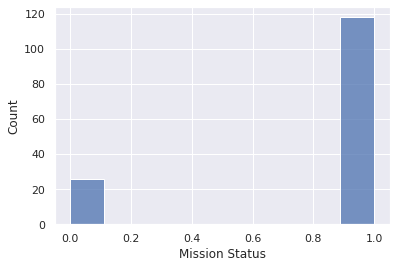

In [60]:
sns.set_theme()
sns.histplot(x='Mission Status',data=data)

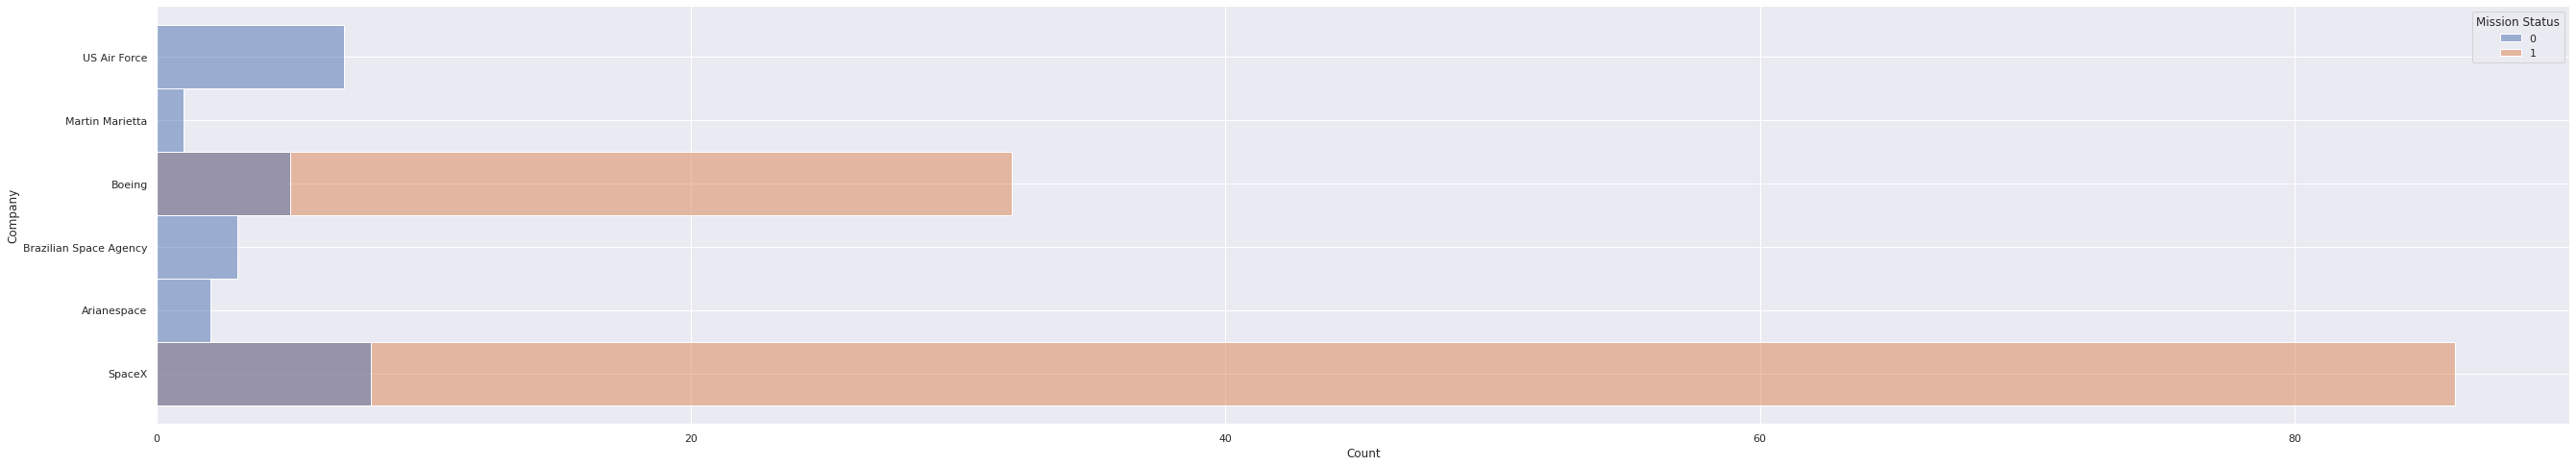

In [61]:
sns.set(rc={'figure.figsize':(45,8)})
sns.histplot(y='Company',hue='Mission Status',data=data)


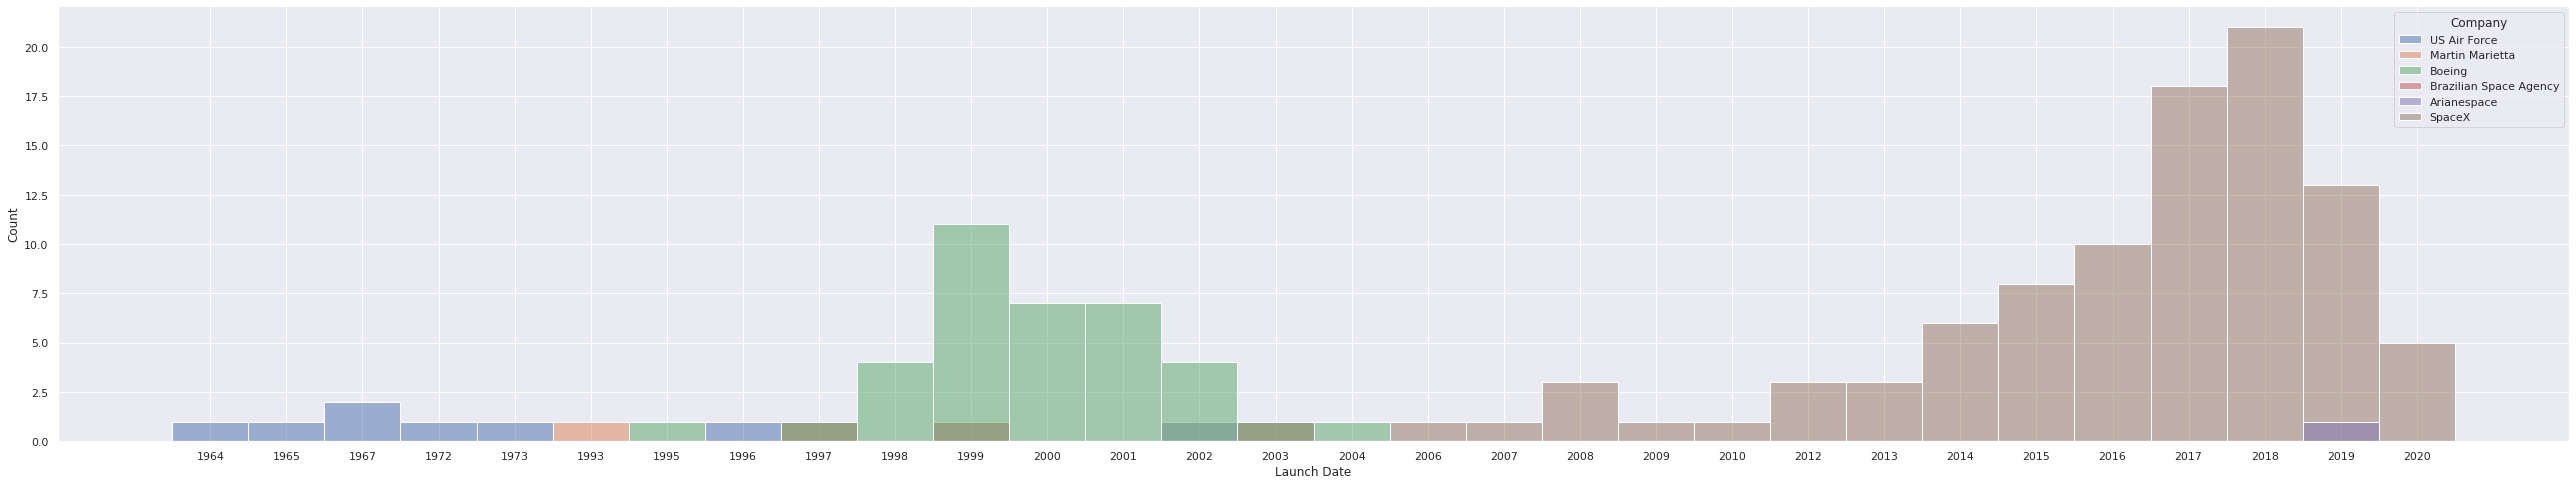

In [62]:
sns.set(rc={'figure.figsize':(45,8)})
sns.histplot(x='Launch Date',data=data,hue='Company')

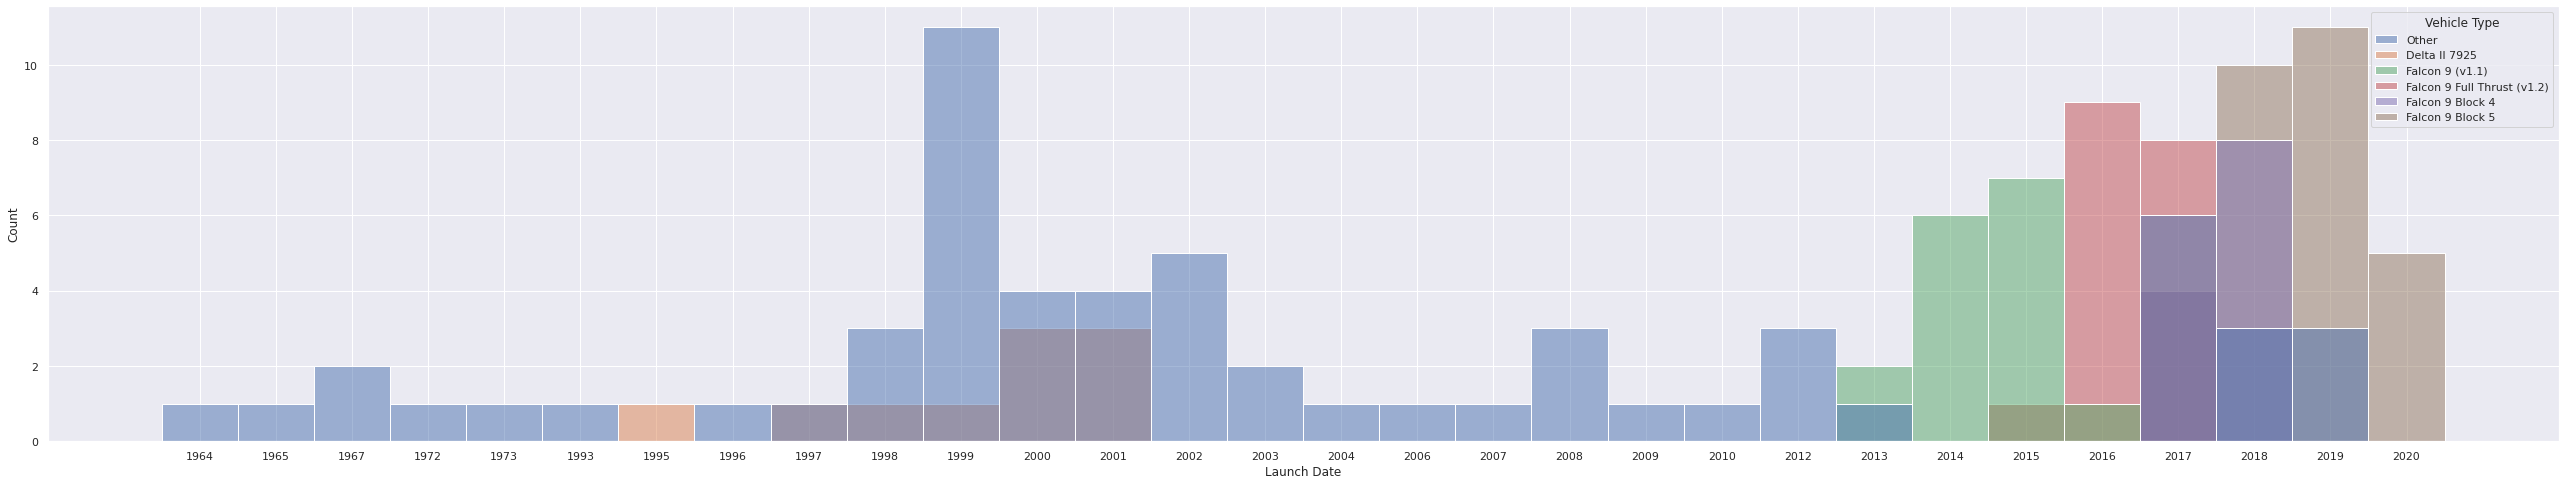

In [63]:
sns.set(rc={'figure.figsize':(45,8)})
sns.histplot(x='Launch Date',data=data,hue='Vehicle Type')

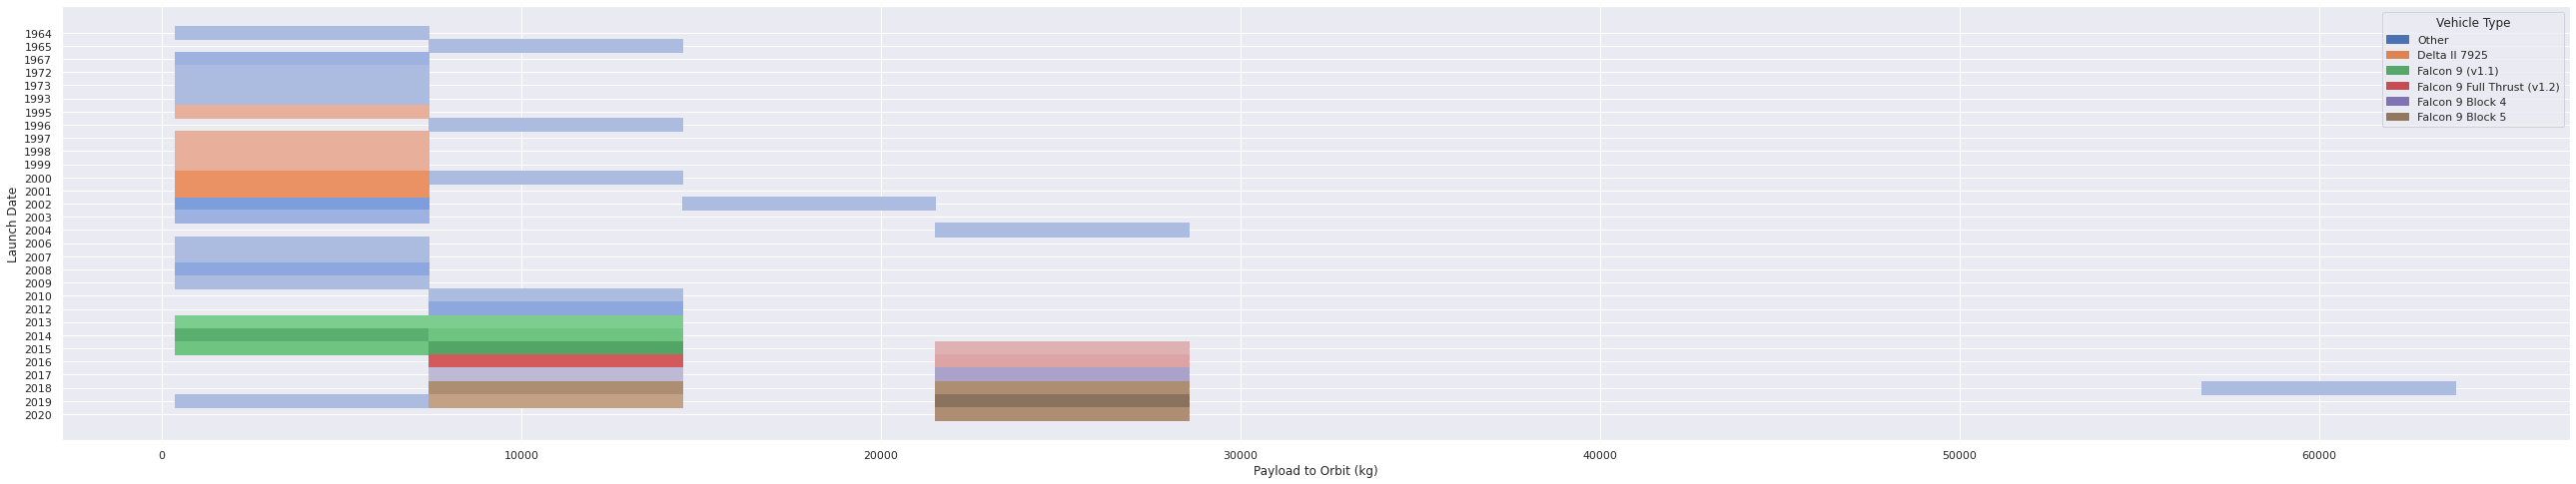

In [64]:
sns.color_palette('husl',9)
sns.set(rc={'figure.figsize':(45,8)})
sns.histplot(x='Payload to Orbit (kg)',y='Launch Date',data=data,hue='Vehicle Type')






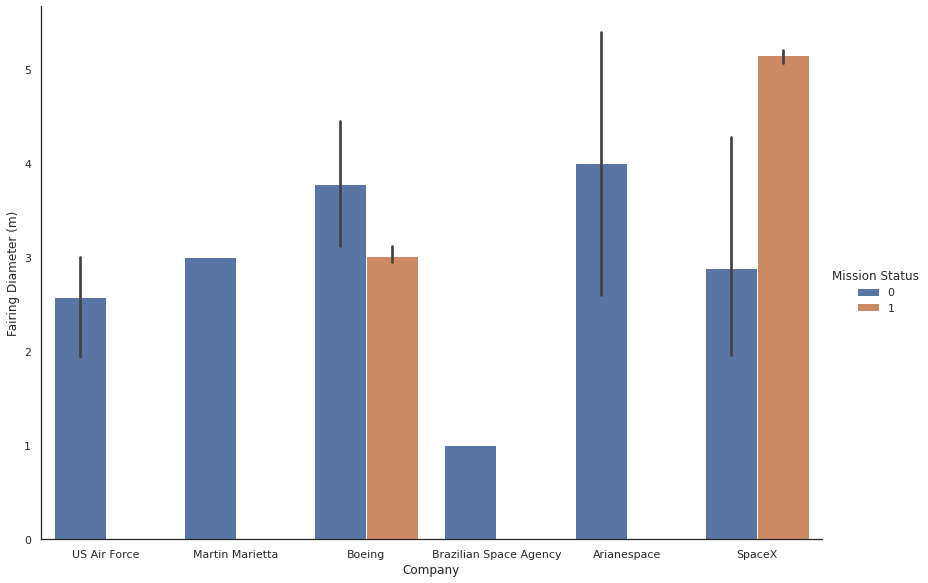

In [65]:
with sns.axes_style('white'):
    
    g = sns.catplot(x="Company",y='Fairing Diameter (m)',hue="Mission Status",data=data, kind="bar", height=8.27, aspect=11.7/8.27)


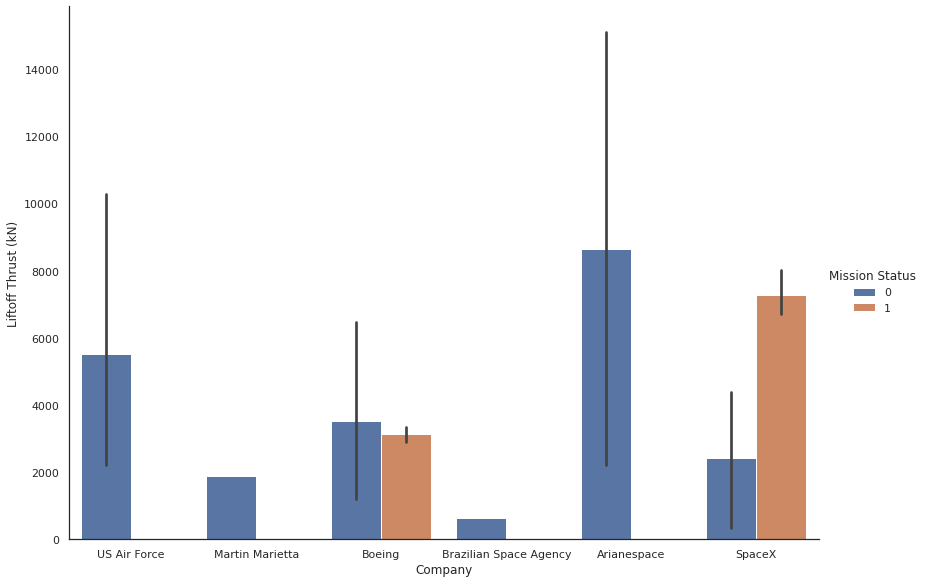

In [66]:
with sns.axes_style('white'):
    
    g = sns.catplot(x="Company",y='Liftoff Thrust (kN)',hue="Mission Status",data=data, kind="bar", height=8.27, aspect=11.7/8.27)

#### sns.color_palette()
sns.set(rc={'figure.figsize':(45,8)})
sns.histplot(x='Launch Date',data=data,hue='Vehicle Type')

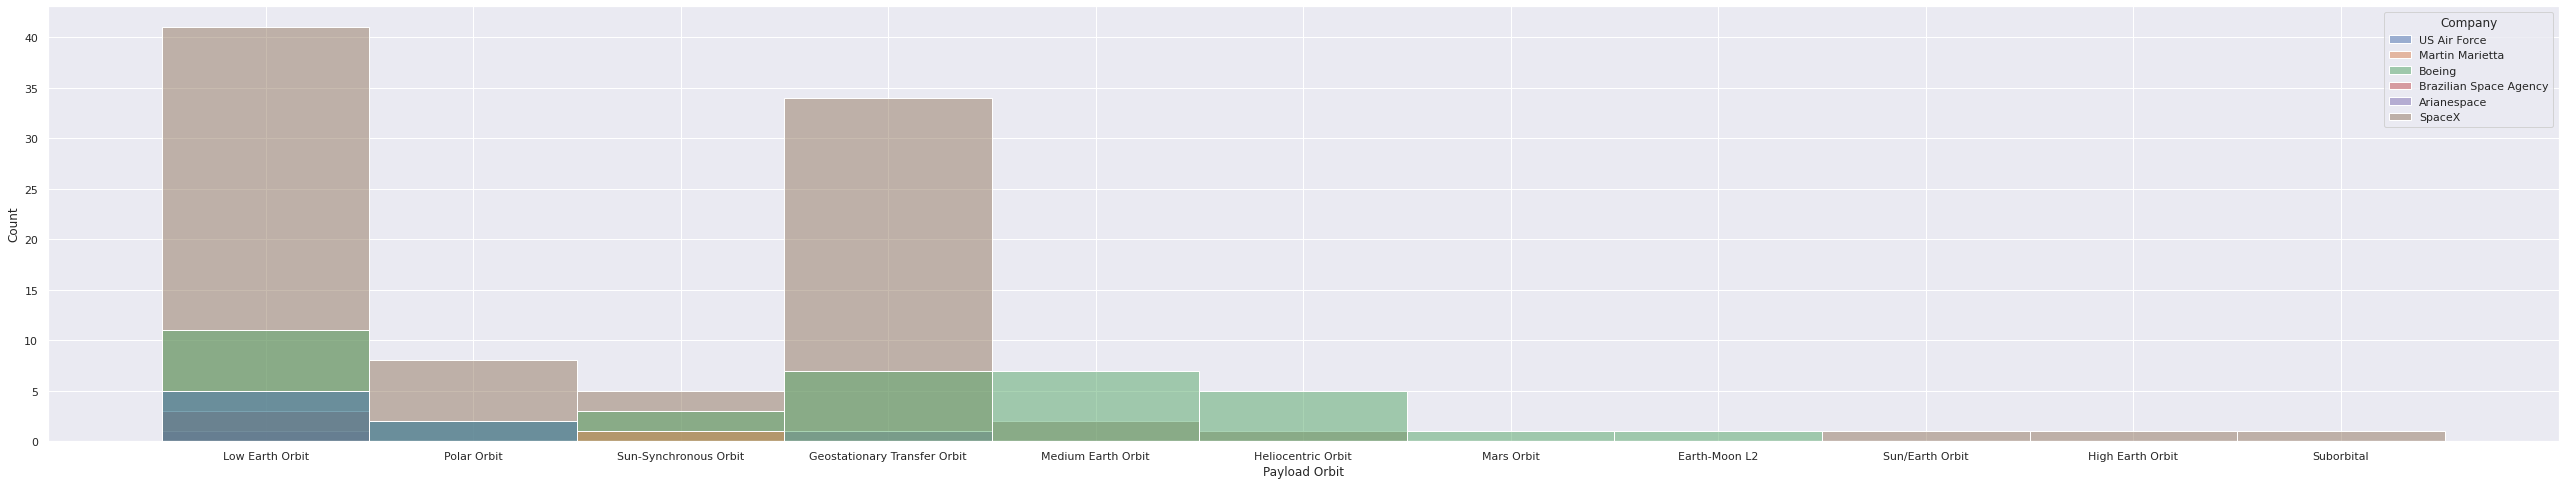

In [67]:
sns.color_palette()
sns.histplot(x='Payload Orbit',hue='Company',data=data)

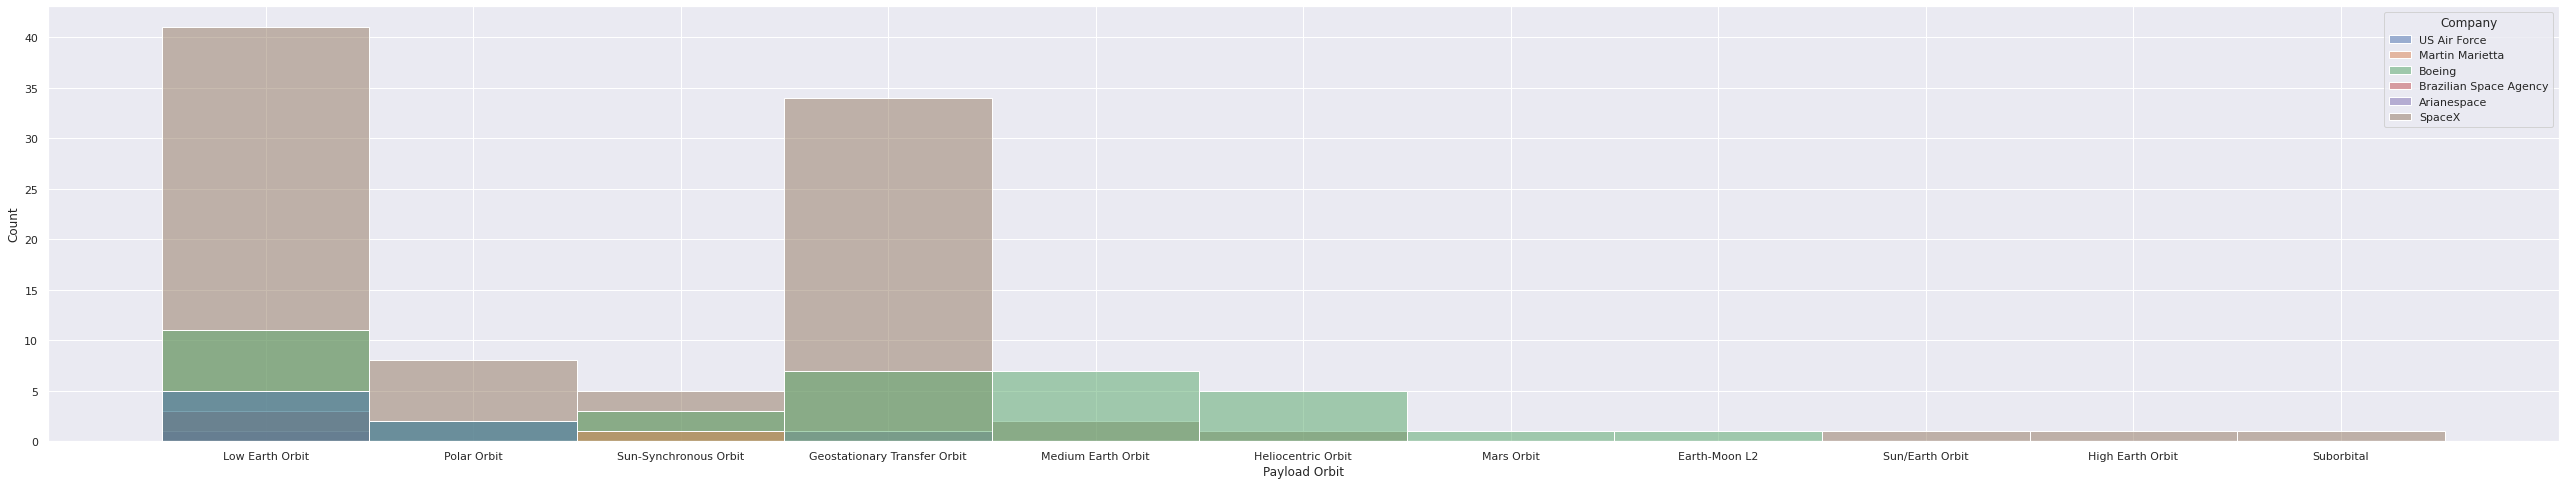

In [68]:
sns.set(rc={'figure.figsize':(45,8)})
sns.histplot(x='Payload Orbit',hue='Company',data=data)

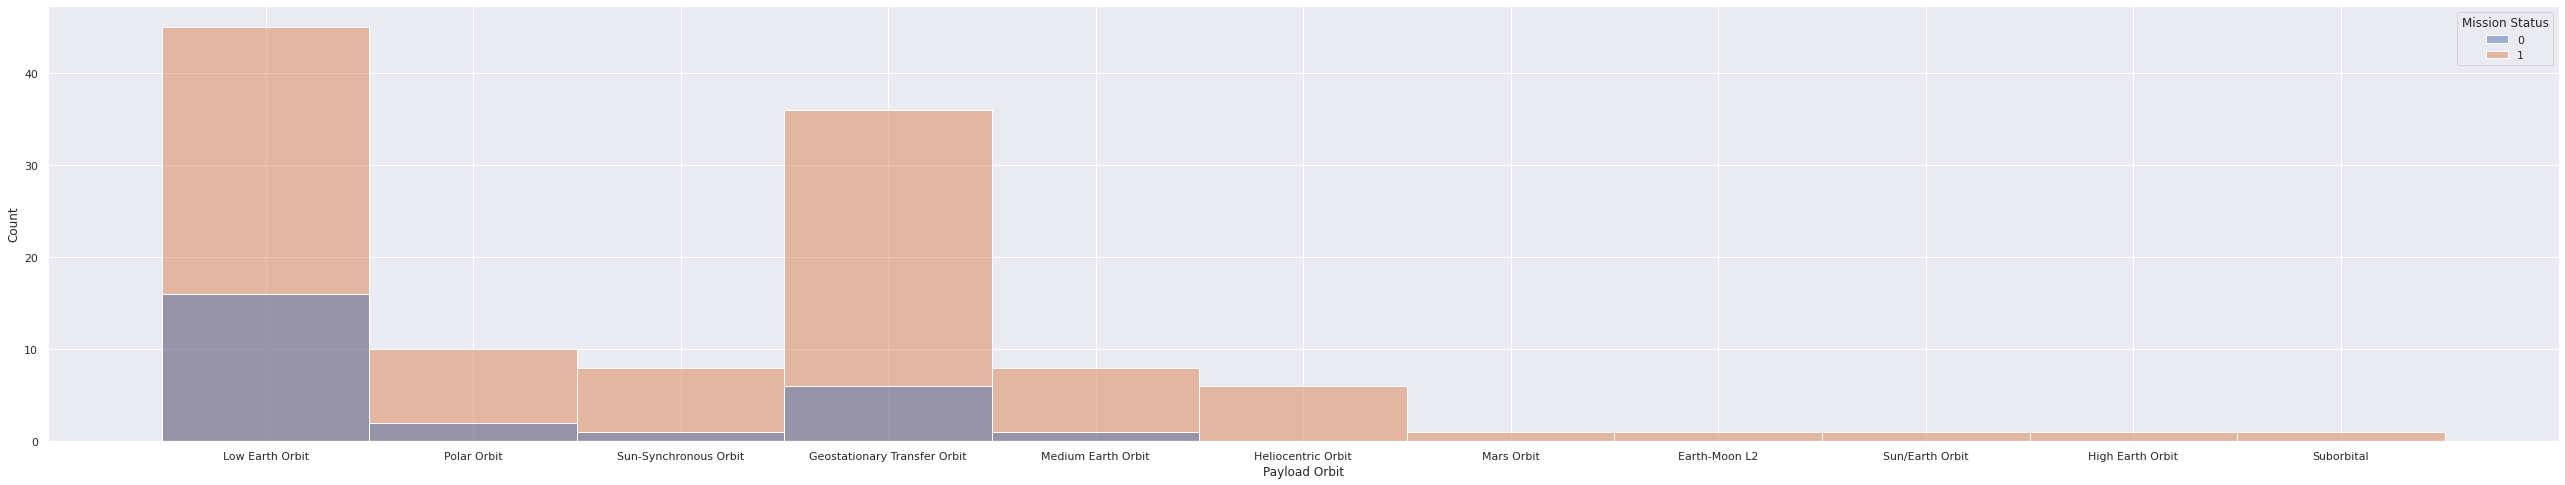

In [69]:
sns.histplot(x='Payload Orbit',hue='Mission Status',data=data)

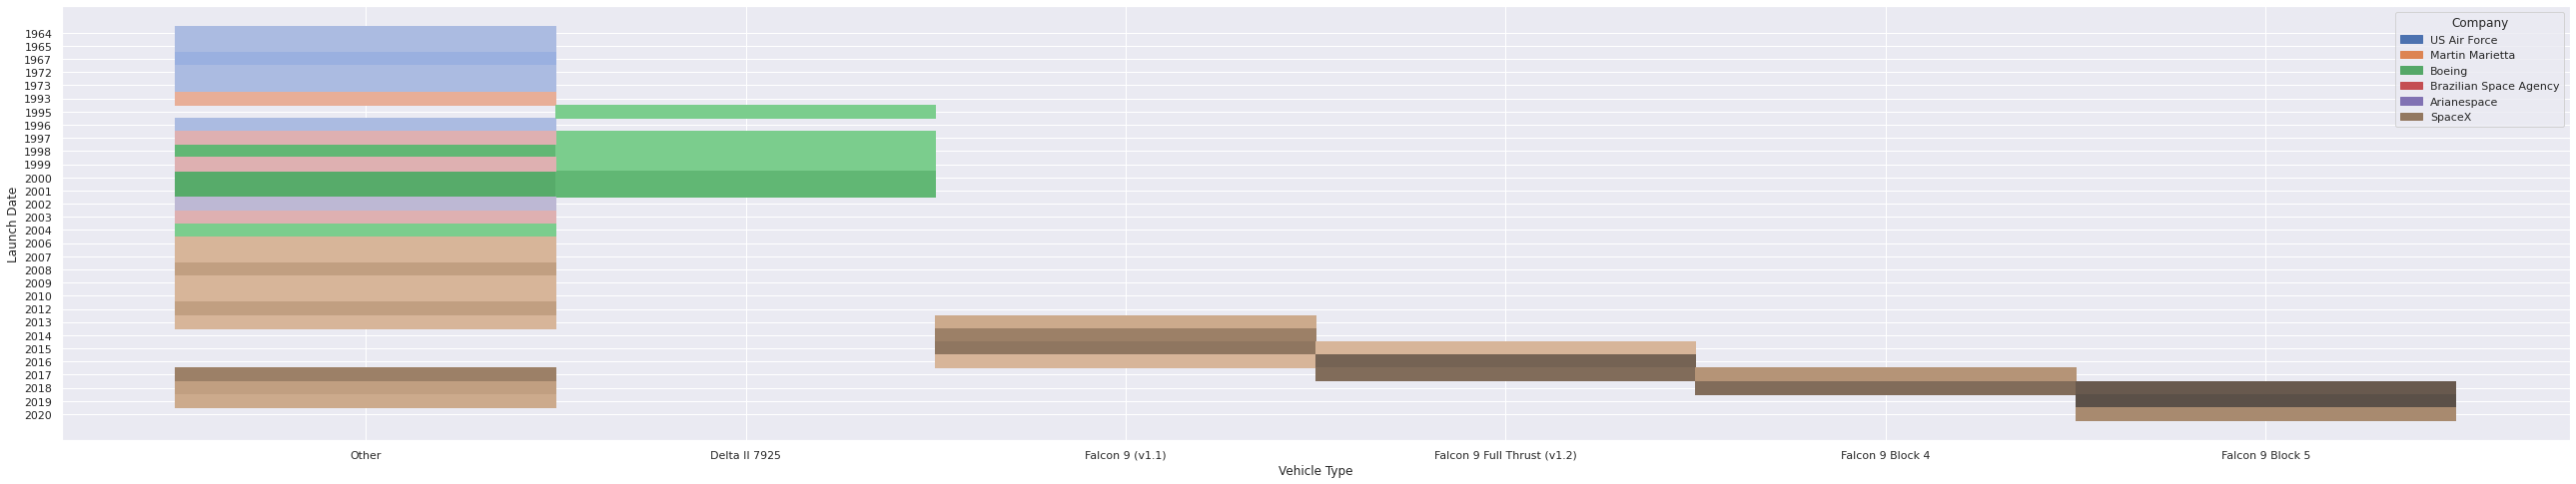

In [70]:
sns.set(rc={'figure.figsize':(45,8)})
sns.histplot(x='Vehicle Type',y='Launch Date',hue='Company',data=data)

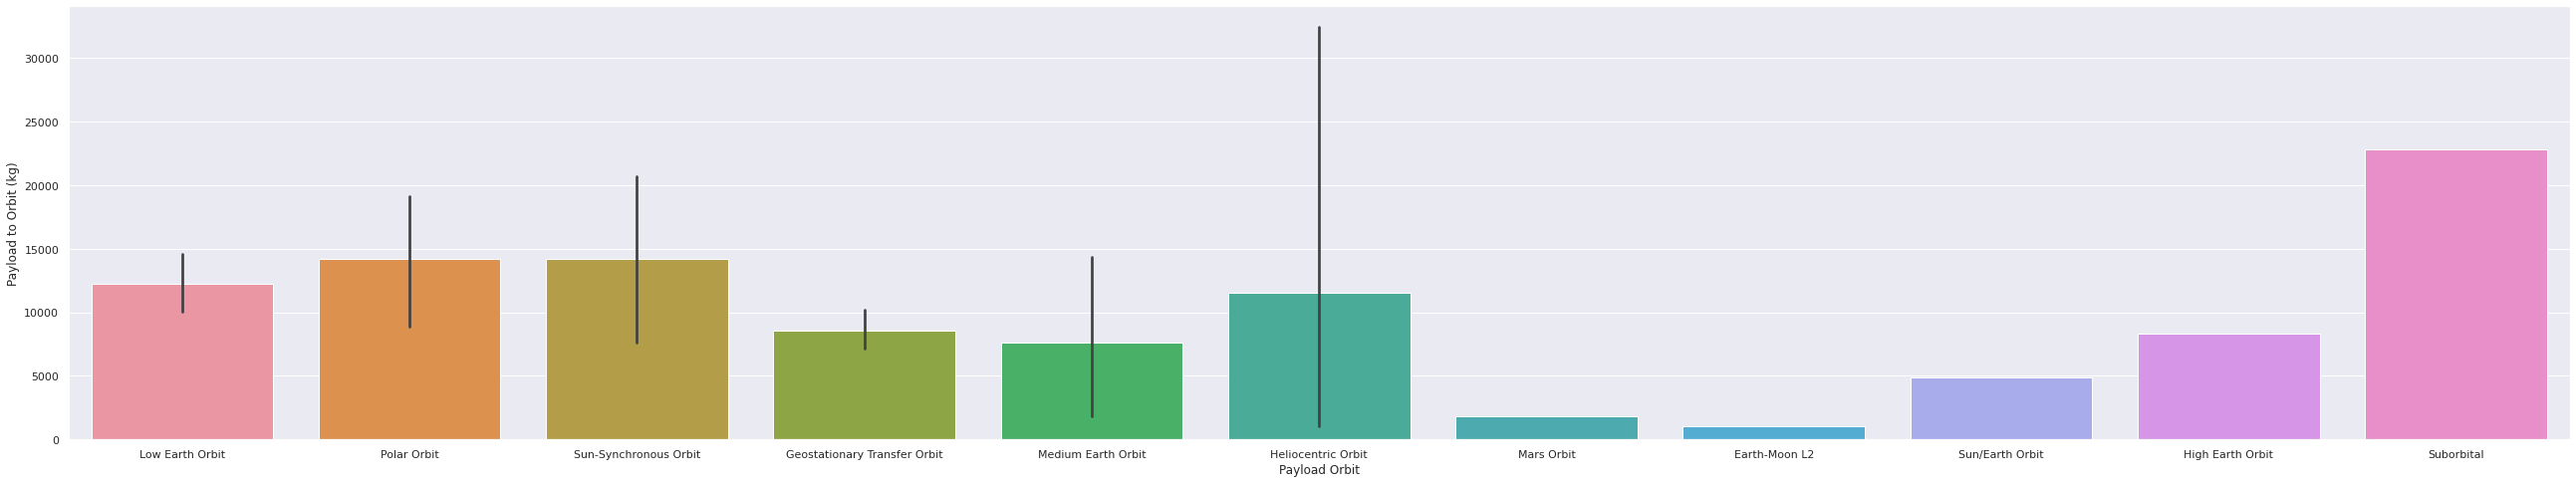

In [71]:
sns.barplot(y='Payload to Orbit (kg)',x='Payload Orbit',data=data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


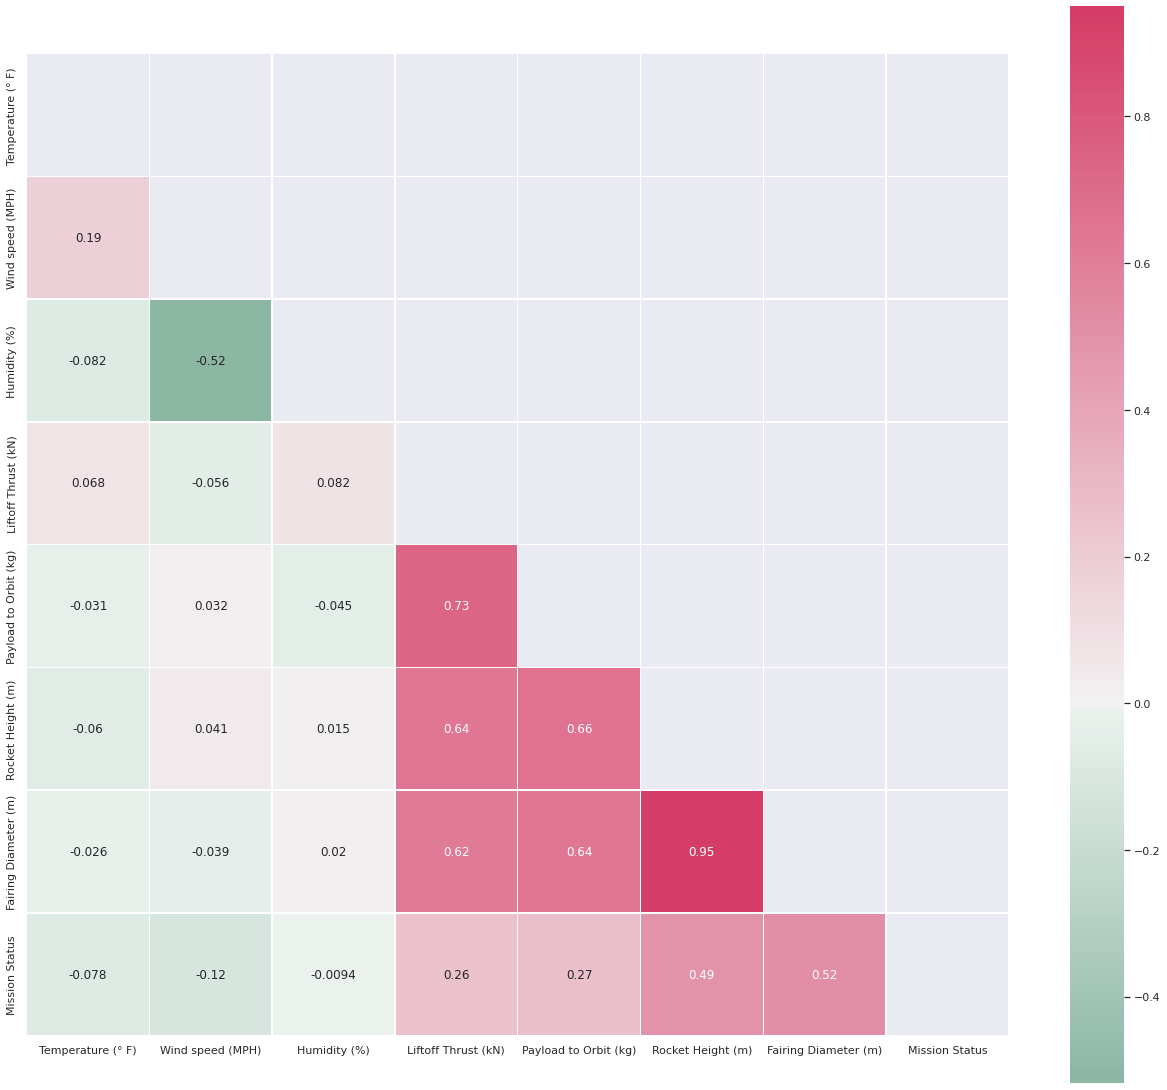

In [72]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

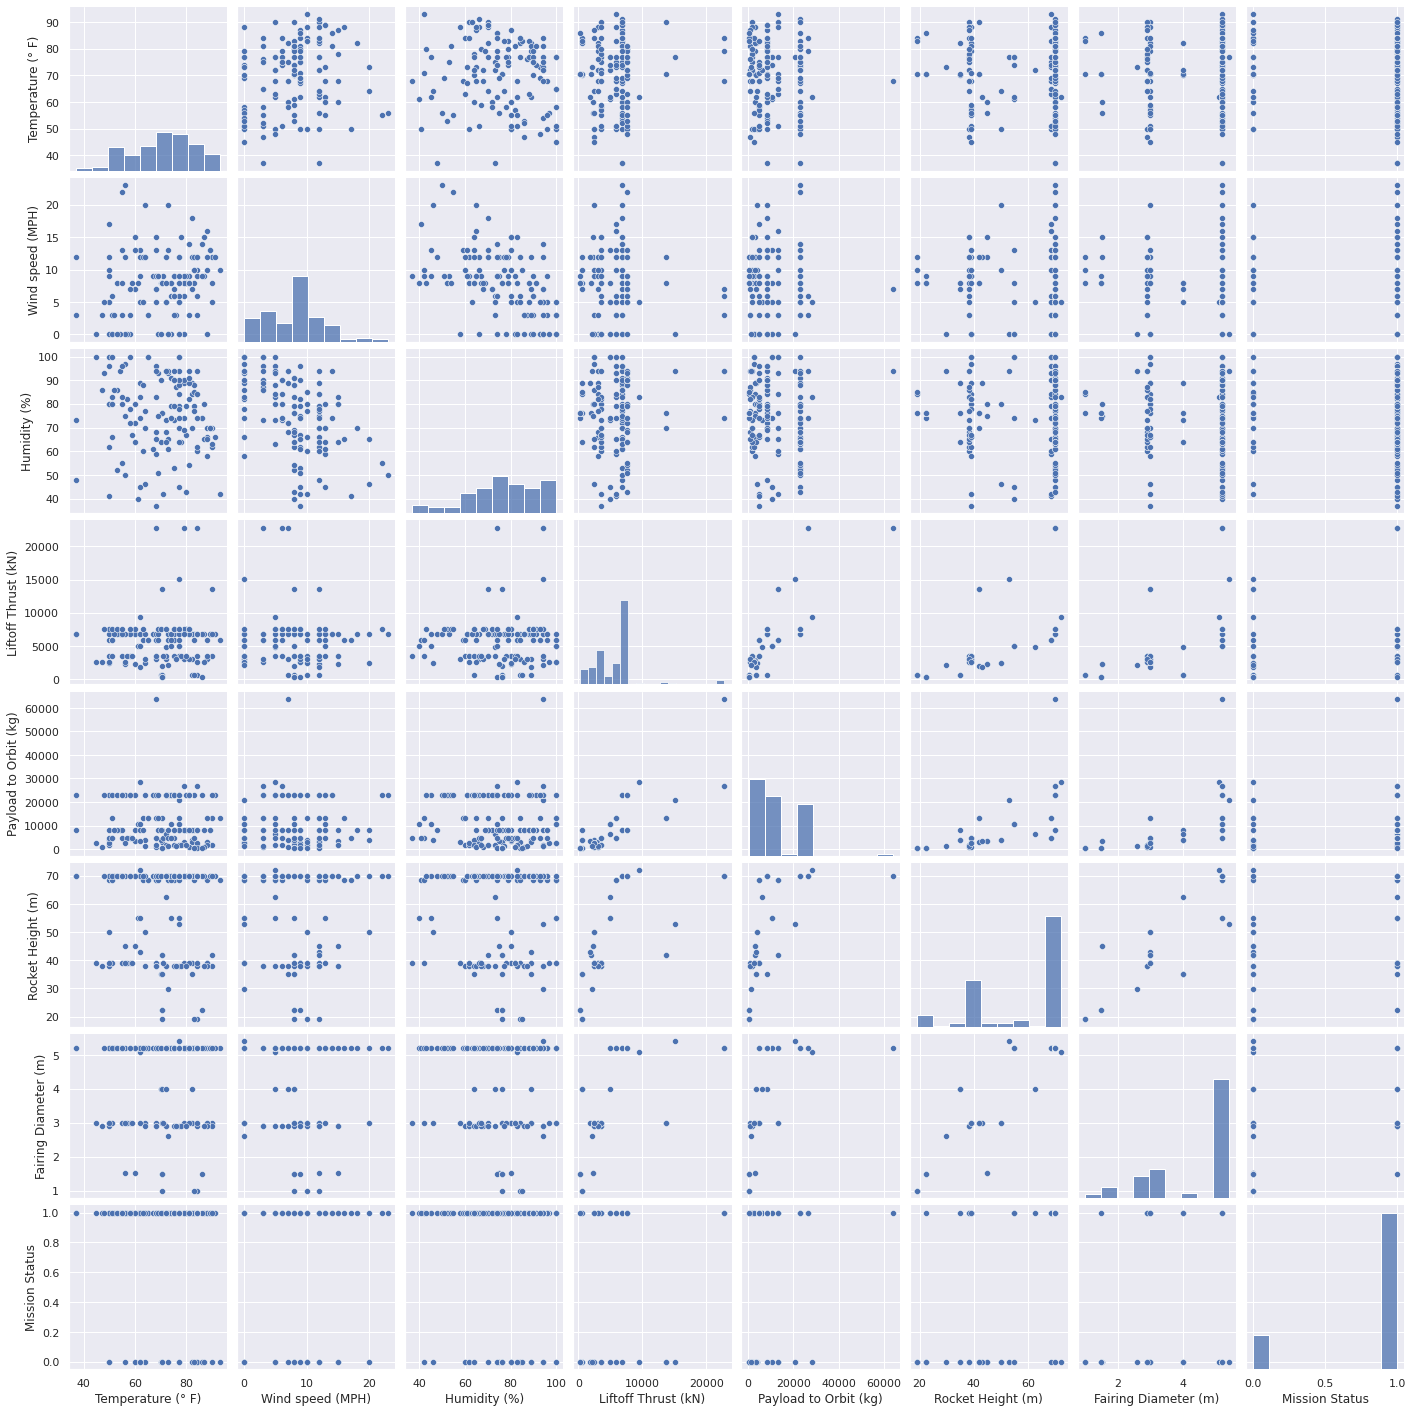

In [73]:
sns.pairplot(data=data)

In [74]:
data

,Company,Launch Date,Temperature (° F),Wind speed (MPH),Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Type,Payload Orbit,Mission Status
20,US Air Force,1964,70.441176,8.007353,76.066176,Other,1936,3100,42.0,3.00,Other,Low Earth Orbit,0
19,US Air Force,1965,70.441176,8.007353,76.066176,Other,13642,13100,42.0,3.00,Research Satellite,Low Earth Orbit,0
18,US Air Force,1967,56.000000,12.000000,75.000000,Other,2300,3300,45.0,1.52,Reconnaissance Satellites,Polar Orbit,0
17,US Air Force,1967,60.000000,15.000000,80.000000,Other,2300,3300,45.0,1.52,Reconnaissance Satellites,Polar Orbit,0
16,US Air Force,1972,64.000000,20.000000,46.000000,Other,2410,4000,50.0,3.00,Reconnaissance Satellites,Low Earth Orbit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,SpaceX,2020,48.000000,5.000000,93.000000,Falcon 9 Block 5,7607,22800,70.0,5.20,Communication Satellite,Low Earth Orbit,1
114,SpaceX,2020,81.000000,8.000000,54.000000,Falcon 9 Block 5,7607,22800,70.0,5.20,Other,Suborbital,1
115,SpaceX,2020,72.000000,8.000000,68.000000,Falcon 9 Block 5,7607,22800,70.0,5.20,Communication Satellite,Low Earth Orbit,1
116,SpaceX,2020,77.000000,9.000000,74.000000,Falcon 9 Block 5,7607,22800,70.0,5.20,Communication Satellite,Low Earth Orbit,1


In [75]:
df=data.iloc[:,0:12]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Temperature (° F)           17.25
Wind speed (MPH)             7.00
Humidity (%)                23.00
Liftoff Thrust (kN)       3293.00
Payload to Orbit (kg)    19550.00
Rocket Height (m)           31.10
Fairing Diameter (m)         2.20
dtype: float64


In [76]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(137, 12)

In [77]:
df['Mission_Status']=data.iloc[:,12:]

In [78]:
df['Company']=enc.fit_transform(df["Company"])
df['Vehicle Type']=enc.fit_transform(df["Vehicle Type"])
df['Payload Type']=enc.fit_transform(df["Payload Type"])
df['Payload Orbit']=enc.fit_transform(df["Payload Orbit"])

In [79]:
df=df.drop('Launch Date',axis=1)

In [80]:
df=df.sample(frac=1)

In [81]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='Mission_Status']
y = df['Mission_Status']
selector = SelectKBest(chi2, k=8)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Temperature (° F)', 'Wind speed (MPH)', 'Vehicle Type',
       'Liftoff Thrust (kN)', 'Payload to Orbit (kg)', 'Rocket Height (m)',
       'Fairing Diameter (m)', 'Payload Type'],
      dtype='object')


In [82]:
df=df.drop('Company',axis=1)
df=df.drop('Temperature (° F)',axis=1)
df=df.drop('Wind speed (MPH)',axis=1)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [84]:
X=df.iloc[:,:8]

In [85]:
X=scaler.fit_transform(X)

In [86]:
cols=['Humidity (%)','Vehicle Type','Liftoff Thrust (kN)','Payload to Orbit (kg)','Rocket Height (m)','Fairing Diameter (m)','Payload Type','Payload Orbit']
df2=pd.DataFrame(X,columns=cols)

In [87]:
df2

,Humidity (%),Vehicle Type,Liftoff Thrust (kN),Payload to Orbit (kg),Rocket Height (m),Fairing Diameter (m),Payload Type,Payload Orbit
0,0.523810,0.8,0.712506,0.282958,0.962264,1.000000,0.000000,0.1
1,0.841270,0.4,0.712506,0.282958,0.962264,1.000000,0.000000,0.1
2,1.000000,0.2,0.611160,0.456234,0.932075,1.000000,0.428571,0.4
3,0.587302,0.2,0.611160,0.159700,0.932075,1.000000,0.000000,0.1
4,0.825397,1.0,0.031429,0.122544,0.301887,0.714286,0.000000,0.1
...,...,...,...,...,...,...,...,...
132,0.761905,1.0,0.030878,0.000000,0.000000,0.000000,0.857143,0.4
133,0.380952,0.8,0.712506,0.801000,0.962264,1.000000,1.000000,0.4
134,0.746032,1.0,0.030878,0.000000,0.000000,0.000000,0.857143,0.4
135,1.000000,0.2,0.611160,0.456234,0.932075,1.000000,0.000000,0.1


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, df.iloc[:,8:], test_size=0.2)

In [89]:
df['Mission_Status'].unique()

array([1, 0])

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [91]:
logreg = LogisticRegression()


In [92]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [93]:
y_pred = logreg.predict(X_test)

In [94]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 1  5]
 [ 0 22]]


In [96]:
from sklearn import svm

In [97]:
clf = svm.SVC()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [98]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [99]:
y_test

,Mission_Status
130,1
143,1
102,1
119,1
40,1
86,1
112,1
78,1
35,1
116,1
